**Import Libraries :**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Load Dataset**

In [52]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Basic Data Exploration**

In [53]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Data Cleaning**

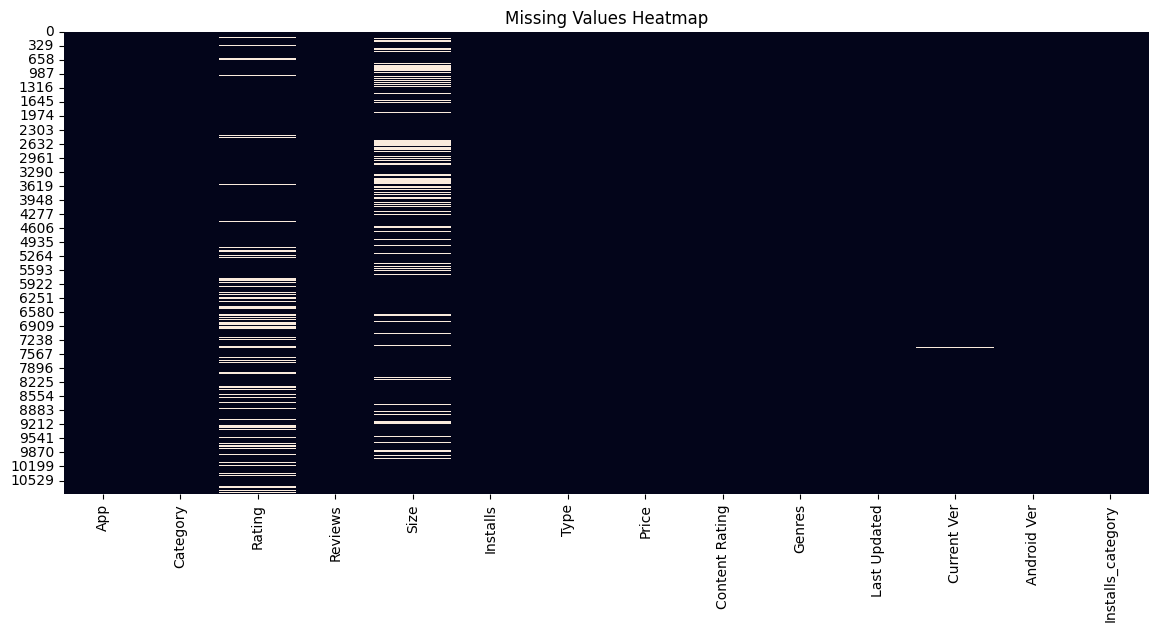

In [54]:
# Removing row with incorrect rating value
df.drop(10472, axis=0, inplace=True)

df['Reviews'] = df['Reviews'].astype(int)

# Function to convert size to bytes
def convert_into_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k','')) * 1024
        elif 'M' in size:
            return float(size.replace('M','')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_into_bytes)

df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].astype(int)

bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no','Very low','Low','Moderate','More than moderate','High','Very High','Top Notch']

df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float)

df.isnull().sum()
# Heatmap for missing values
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

df.dropna(subset=['Current Ver', 'Android Ver', 'Type', 'Genres'], inplace=True)


**Correlation Analysis**

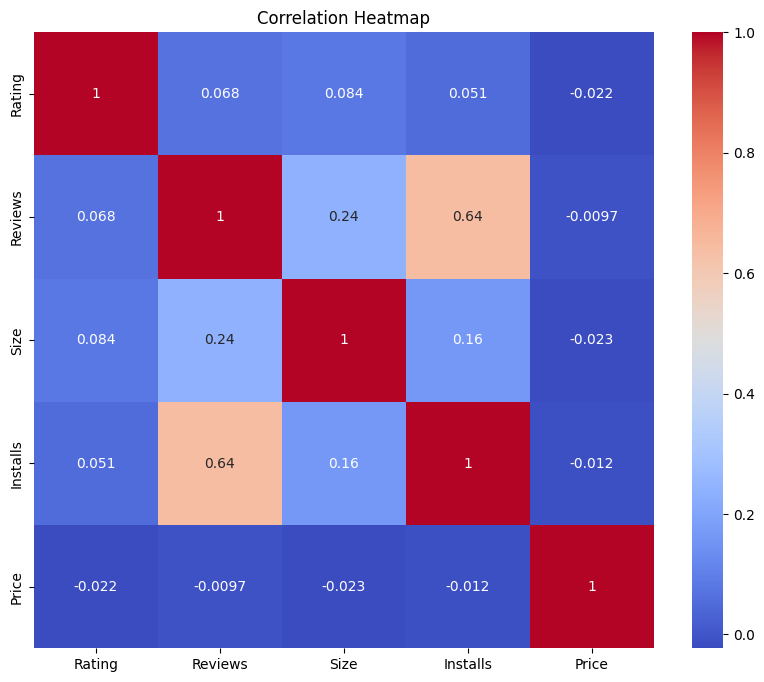

In [55]:
numeric_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Fill Missing Ratings Smartly**

In [56]:
rating_means = df.groupby('Installs_category')['Rating'].mean()
rating_means
for category in rating_means.index:
    df.loc[
        (df['Rating'].isnull()) & (df['Installs_category'] == category),
        'Rating'
    ] = rating_means[category]
df['Rating'].isnull().sum()

np.int64(14)

**Remove Duplicates**

In [57]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(10346, 14)

**Rating Distribution**

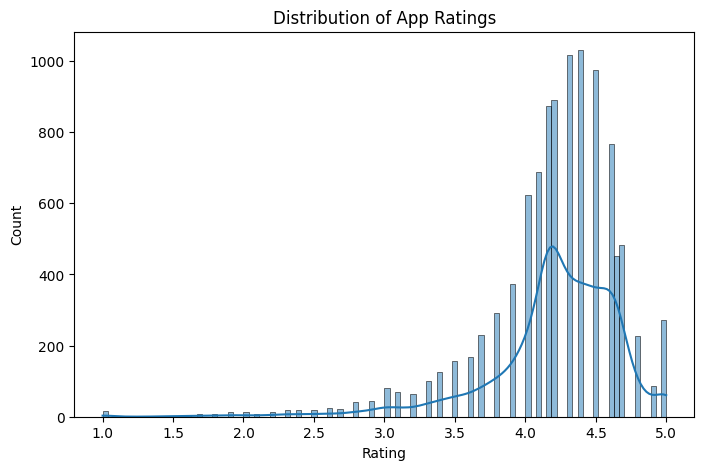

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], kde=True)
plt.title("Distribution of App Ratings")
plt.show()


**Apps Count by Category**

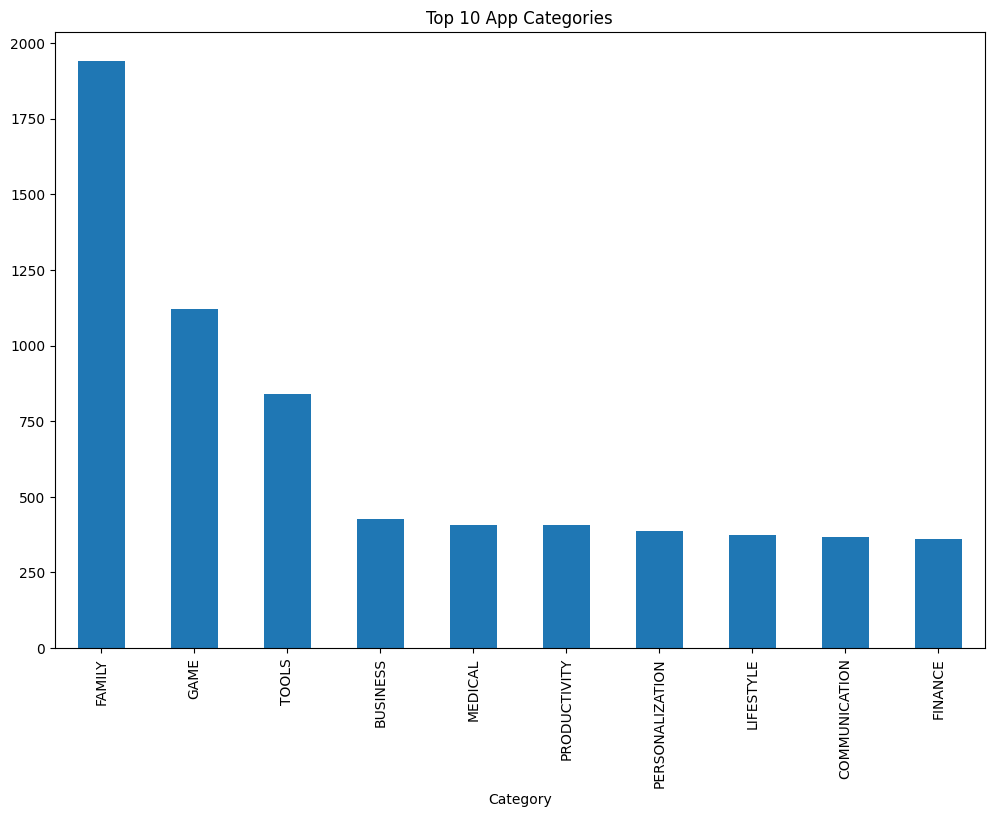

In [59]:
plt.figure(figsize=(12,8))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 App Categories")
plt.show()

**Reviews vs Installs (Log Scale)**

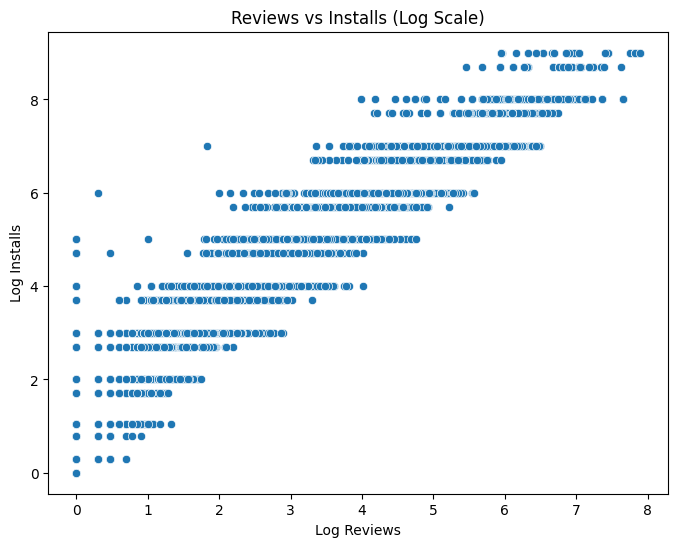

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=np.log10(df['Reviews']+1),
    y=np.log10(df['Installs']+1)
)
plt.title("Reviews vs Installs (Log Scale)")
plt.xlabel("Log Reviews")
plt.ylabel("Log Installs")
plt.show()

**Key Insights**

**1. Highest Number of Apps**

In [61]:
df['Category'].value_counts().head(10)

,count
Category,
FAMILY,1939
GAME,1121
TOOLS,841
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,386
LIFESTYLE,373
COMMUNICATION,366


**2. Highest Installs**

In [62]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

,Installs
Category,
GAME,31544024415
COMMUNICATION,24152276251
SOCIAL,12513867902
PRODUCTIVITY,12463091369
TOOLS,11452271905
FAMILY,10041632405
PHOTOGRAPHY,9721247655
TRAVEL_AND_LOCAL,6361887146
VIDEO_PLAYERS,6222002720


**3. Highest Reviews**

In [63]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

,Reviews
Category,
GAME,1415536650
COMMUNICATION,601273552
SOCIAL,533576829
FAMILY,396771746
TOOLS,273181033
PHOTOGRAPHY,204297410
VIDEO_PLAYERS,110380188
PRODUCTIVITY,102554498
SHOPPING,94931162


**4. Highest Average Rating**

In [64]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

,Rating
Category,
EVENTS,4.394346
EDUCATION,4.373794
ART_AND_DESIGN,4.367122
BOOKS_AND_REFERENCE,4.358435
PERSONALIZATION,4.333325
GAME,4.281926
HEALTH_AND_FITNESS,4.273890
SOCIAL,4.260441
PARENTING,4.259759


### Conclusion

- GAME and COMMUNICATION categories dominate installs and reviews
- Higher installs lead to higher reviews
- Rating improves with popularity
- Paid apps do not guarantee success
- Size has weak correlation with installs




**Select Features for ML**

In [65]:
ml_df = df[['Reviews', 'Size', 'Installs', 'Price', 'Rating']].copy()
ml_df.head()

,Reviews,Size,Installs,Price,Rating
0,159,19922944.0,10000,0.0,4.1
1,967,14680064.0,500000,0.0,3.9
2,87510,9122611.2,5000000,0.0,4.7
3,215644,26214400.0,50000000,0.0,4.5
4,967,2936012.8,100000,0.0,4.3


**Handle Remaining Missing Values**

In [66]:
ml_df.isnull().sum()
ml_df['Size'].fillna(ml_df['Size'].median(), inplace=True)
ml_df['Rating'].fillna(ml_df['Rating'].median(), inplace=True)

**Split Features & Target**

In [67]:
X = ml_df.drop('Rating', axis=1)
y = ml_df['Rating']

**Train-Test Split**

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

**Feature Scaling**

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train Linear Regression Model**

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

**Make Predictions**

In [71]:
y_pred = lr.predict(X_test_scaled)

**Model Evaluation**

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.3355867509558373
RMSE: 0.49249079652452277
R2 Score: 0.0064079541886896685


**Actual vs Predicted Plot**

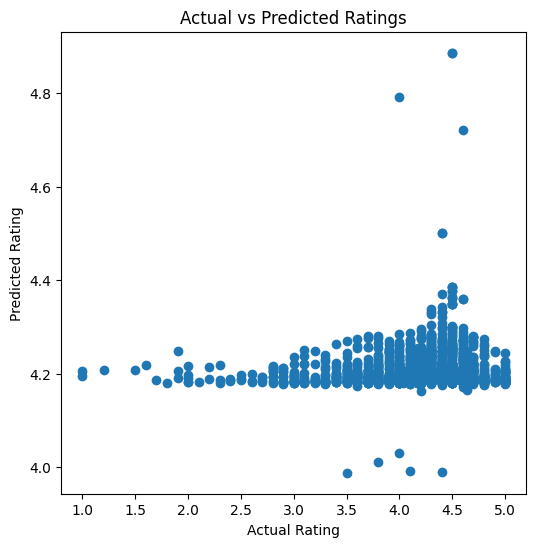

In [73]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.show()

**Feature Importance**

In [74]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
0,Reviews,0.025337
1,Size,0.022515
2,Installs,0.004075
3,Price,-0.007352


### Machine Learning Conclusion

- Linear Regression was used to predict app ratings
- Reviews and Installs have the strongest impact on ratings
- Price has minimal effect on rating
- Model performs reasonably well for real-world app data
- This model can help developers estimate expected ratings before launch
